Please read the handout for homework 2 before attempting this. This homework shall give you more hands on experience with SQL queries and some data visualization using pandas library. 

You should use the __imdb.db__ file you created in homework 1 for this homework. All the tables to be referenced should be in your __imdb.db__ file.

All SQL queries that you are supposed to write should be entered as strings, e.g. "SELECT some\_field from some\_table"


In [93]:
import sqlite3, pandas as pd

__1.__ Complete the following people_query with an SQL query to select everything from *people* table.

In [94]:
con= sqlite3.connect('imdb.db')
c=con.cursor()
people_query = c.execute('''SELECT * FROM people;''')
pd.DataFrame(people_query)

,0,1,2,3,4,5
0,nm0000093,Brad Pitt,1963,,"actor,producer,soundtrack","tt0816711,tt0356910,tt1210166,tt0114746"
1,nm0000098,Jennifer Aniston,1969,,"actress,producer,soundtrack","tt1038919,tt1723121,tt0108778,tt3442006"
2,nm0000099,Patricia Arquette,1968,,"actress,director,producer","tt0145531,tt0108399,tt0412175,tt1065073"
3,nm0000104,Antonio Banderas,1960,,"actor,soundtrack,producer","tt0120657,tt0120746,tt1189073,tt0112851"
4,nm0000105,Adrienne Barbeau,1945,,"actress,writer,soundtrack","tt0090685,tt0082340,tt1024648,tt0080749"
...,...,...,...,...,...,...
107061,nm9993398,Oliviero Del Papa,,,writer,"tt10941386,tt8992942,tt8743200,tt10270592"
107062,nm9993444,Jason Winter,,,actor,"tt8743272,tt10540122"
107063,nm9993573,Lakisha Louissaint,,,"director,writer,producer",tt10299418
107064,nm9993636,Adam French,,,actor,"tt10227780,tt6164916,tt10842376"


In [95]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__2.__ Complete the following titles_query with an SQL query to select the first 20 distinct REGION from the *titles* table.

In [96]:
titles_query = c.execute('''SELECT DISTINCT REGION FROM titles LIMIT 20;''')

pd.DataFrame(titles_query)


,0
0,FR
1,VE
2,PL
3,DE
4,HU
5,PT
6,BR
7,US
8,GB
9,GR


In [97]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__3.__ Complete the following production_query with an SQL query to select the first 5 rows from the *production* table where *TITLE_TYPE* = “movie” and *START_YEAR* >= 2018.

In [98]:
production_query = c.execute('''SELECT * FROM productions WHERE title_Type= 'movie' AND START_YEAR>=2018 LIMIT 5;''')

pd.DataFrame(production_query)


,0,1,2,3,4,5,6,7
0,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,2018,0,122,Drama
1,tt0069204,movie,Sabse Bada Sukh,Sabse Bada Sukh,2018,0,0,"Comedy,Drama"
2,tt0085953,movie,Devil Fetus,Mo tai,2019,0,84,Horror
3,tt0111414,movie,A Thin Life,A Thin Life,2018,0,75,Comedy
4,tt0116991,movie,Mariette in Ecstasy,Mariette in Ecstasy,2019,0,0,Drama


In [99]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__4.__ Complete the following avg_production_query with an SQL query to first select the average *RUNTIME_MINUTES* for each *TITLE_TYPE* and __order them  alphabetically__ according to *TITLE_TYPE* from the *productions* table. Then select the *TITLE_TYPE*, and __average__ *RUNTIME_MINUTES*. <br/> 
__Note:__ These are not two separate queries, and can be implemented in a single SQL query.


In [100]:
avg_production_query = c.execute('''Select title_Type, avg(RUNTIME_MINUTES) FROM productions GROUP BY title_Type ORDER BY title_Type''')

pd.DataFrame(avg_production_query)


,0,1
0,movie,45.484017
1,short,6.447541
2,tvEpisode,4.325094
3,tvMiniSeries,10.775281
4,tvMovie,31.210023
5,tvSeries,11.813807
6,tvShort,12.780702
7,tvSpecial,43.037871
8,video,20.874394
9,videoGame,0.538647


In [101]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__5.__ Complete the following tconst with an SQL query to do the following:

From the productions that are released in __more than 10 languages__ in the *titles* table, select the *TCONST*

In [102]:
tconst =c.execute('''SELECT COUNT(tconst) from titles GROUP BY title HAVING COUNT(language)>10  ''')
pd.DataFrame(tconst)

,0
0,82
1,82
2,64
3,28
4,81
...,...
7550,17
7551,14
7552,13
7553,13


In [103]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__6.__ Write Python code to plot a histogram showing the number of TV Specials released over the years in *productions.csv*. Use the plot function from pandas.


,a,b
0,2018,101.0
1,2019,133.0
2,2017,709.0
3,2020,34.0


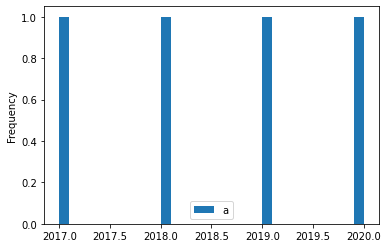

In [104]:
### Your code here ###

spec=c.execute(''' SELECT COUNT (title_Type) from productions Where title_type='tvSpecial' GROUP BY start_Year''')
x=pd.DataFrame(spec)
x.dropna(inplace=True)
year=c.execute(''' SELECT DISTINCT start_Year from productions''')
y=pd.DataFrame(year)
y.dropna(inplace=True)
df = pd.concat([y, x], axis=1)
df.columns={'a','b'}
df.dropna(inplace=True)
df.plot( x='b', kind='hist',bins=30)
df

__7.__ Write Python code to create a smaller dataframe consisting only of videos started in or before 2018 in *productions.csv*, and with two columns, *startYear* and *runtimeMinutes*. Then apply the boxplot method in *pandas* to see the median and spread of the runtimeMinutes of videos each year on or before 2018. Since you want one boxplot for each year, you will have to use the ‘by’ option.


59460.0


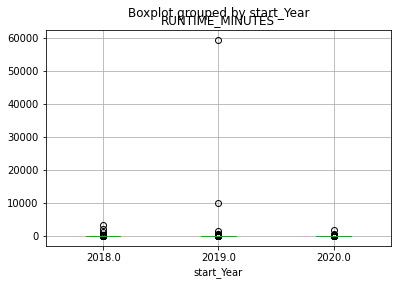

In [105]:
### Your code here ###

spec=c.execute(''' SELECT start_Year, RUNTIME_MINUTES from productions Where start_Year>=2018''')
x=pd.DataFrame(spec,columns=['start_Year','RUNTIME_MINUTES'])
nan_value = float("NaN")
x.replace("", nan_value, inplace=True)
x.dropna(inplace=True)
x.boxplot(column='RUNTIME_MINUTES',by='start_Year')
print(x['RUNTIME_MINUTES'].max())